In [1]:
# Test how ALE/MOM_regridding.F90 evaluates the interfaces of the diagnostic grid
# when rho2 is specified and the RFNC options is noted
# (see comments on Evernote)

# This is how the function looks in the Fortran code 
# (where the terms after read are what is specified after RFNC1: in MOM_input)

#   read( string, *) nk, rho_1, rho_2, rho_3, drho, rho_4, drho_min
#   allocate(rho_target(nk+1))
#   nki = nk + 1 - 4 ! Number of interfaces minus 4 specified values
#   rho_target(1) = rho_1
#   rho_target(2) = rho_2
#   dx = 0.
#   do k = 0, nki
#     ddx = max( drho_min, real(nki-k)/real(nki*nki) )
#     dx = dx + ddx
#     rho_target(3+k) = rho_3 + (2. * drho) * dx
#   enddo
#   rho_target(nki+4) = rho_4

In [14]:
import numpy as np
from matplotlib import pyplot as plt

In [75]:
def rho_function1(nk,rho_1,rho_2,rho_3,drho,rho_4,drho_min,plot=True):
    rho_target = np.zeros(nk+1)
    rho_target[:]=np.nan
    rho_target[0]=rho_1
    rho_target[1]=rho_2

    nki = nk+1-4
    dx = 0
    for k in range(nki+1):
        ddx = np.max([drho_min, (nki-k)/(nki*nki)])
        dx = dx + ddx
        rho_target[3-1+k] = rho_3 + (2*drho)*dx
    
    rho_target[nki+4-1]=rho_4
    
    if plot:
        plt.plot(np.diff(rho_target),(rho_target[1:]+rho_target[:-1])/2,'.')
        plt.gca().set_xlim([0,1])
        plt.gca().set_title('delta rho as a function of rho')
    
    return rho_target

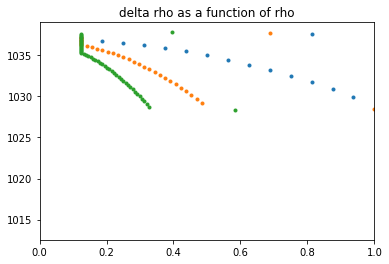

In [77]:
nk = 19
rho_1 = 999.5
rho_2 = 1028
rho_3 = 1028.5
drho = 8
rho_4 = 1038
drho_min = 0.0078125

rho_target = rho_function1(nk,rho_1,rho_2,rho_3,drho,rho_4,drho_min)

nk = 35
rho_1 = 999.5
rho_2 = 1028
rho_3 = 1028.5
drho = 8
rho_4 = 1038
drho_min = 0.0078125

rho_target = rho_function1(nk,rho_1,rho_2,rho_3,drho,rho_4,drho_min)

nk = 51
rho_1 = 999.5
rho_2 = 1028
rho_3 = 1028.25
drho = 8
rho_4 = 1038
drho_min = 0.0078125

rho_target = rho_function1(nk,rho_1,rho_2,rho_3,drho,rho_4,drho_min)